# SVM [Support Vector Machine] - Iris Project 

We’ll use the Iris dataset, a famous dataset for beginners in machine learning. It contains three classes of flowers:

- Setosa
- Versicolor
- Virginica

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Iris DataSet Loading 

In [11]:
iris = datasets.load_iris()
x = iris.data[:, :2]  
y = iris.target 

# Prnting the Data

In [12]:
print("Features Shape:", x.shape)
print("Labels Shape:", y.shape)

Features Shape: (150, 2)
Labels Shape: (150,)


# Visualize the Model Data using Scatter PLot

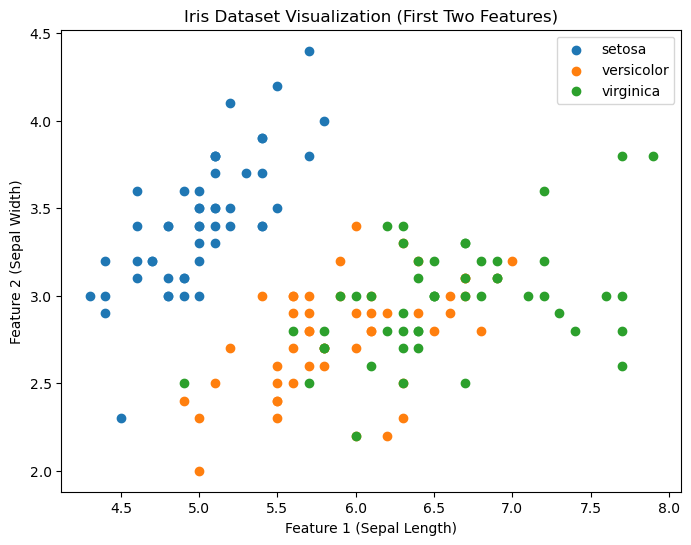

In [13]:
plt.figure(figsize=(8, 6))
for i, label in enumerate(iris.target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], label=label)
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.legend()
plt.title("Iris Dataset Visualization (First Two Features)")
plt.show()

# Preprocess & split the data into trqaina nd test models

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Modeling the SVM [ SVC ] model

In [24]:
svm_model = SVC(kernel= 'rbf', C=0.1, gamma = 'scale', random_state=42)
svm_model.fit(x_train, y_train)

SVC(C=0.1, random_state=42)

# Visualize and Predict the model

In [25]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8222222222222222

Confusion Matrix:
 [[19  0  0]
 [ 0  8  5]
 [ 0  3 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.62      0.67        13
           2       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



# Visuzlizing the Decision Boundaries

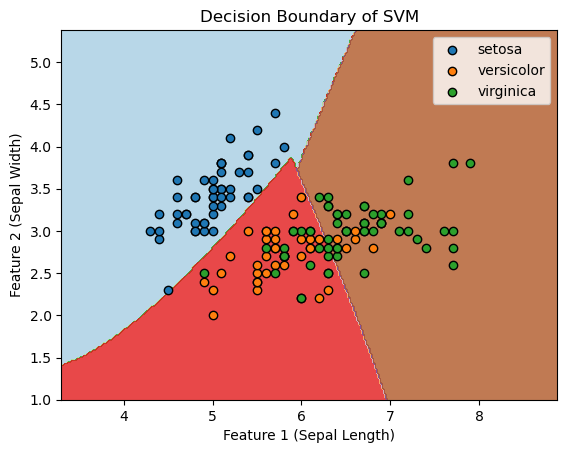

In [27]:
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    for i, label in enumerate(iris.target_names):
        plt.scatter(x[y == i, 0], x[y == i, 1], label=label, edgecolor='k')
    plt.xlabel("Feature 1 (Sepal Length)")
    plt.ylabel("Feature 2 (Sepal Width)")
    plt.legend()
    plt.title("Decision Boundary of SVM")
    plt.show()

plot_decision_boundary(x, y, svm_model)